In [61]:
!pip install scikit-learn
!pip install pandas 

In [62]:
import pandas as pd

In [63]:
data = pd.read_csv("./datasets/Housing.csv")

In [64]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [66]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [67]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [68]:
le = LabelEncoder()

In [70]:
data['mainroad'] = le.fit_transform(data['mainroad'])

In [73]:
data.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,1,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,0,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,1,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,0,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,1,no,no,no,no,0,no,unfurnished


In [74]:
data['guestroom'] = le.fit_transform(data['guestroom'])
data['basement'] = le.fit_transform(data['basement'])

In [76]:
data.head()
data.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,1,0,1,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,0,0,0,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,1,0,0,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,0,0,0,no,no,0,no,furnished
544,1750000,3850,3,1,2,1,0,0,no,no,0,no,unfurnished


In [79]:
onhe = OneHotEncoder(sparse_output = False,drop = 'first')

In [81]:
encoded  = onhe.fit_transform(data[['furnishingstatus']])

In [82]:
encoded

array([[0., 0.],
       [0., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 0.],
       [0., 1.]])

In [100]:
encodedData = pd.DataFrame(encoded,columns=onhe.get_feature_names_out(['furnishingstatus']))

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,1,0,0,no,yes,3,no,furnished
2,12250000,9960,3,2,2,1,0,1,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,1,0,1,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,1,1,1,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,0,0,0,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,1,0,0,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,0,0,0,no,no,0,no,furnished


In [86]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics  import mean_squared_error,r2_score

In [135]:
data1 = data[['price','area']]
data1

,price,area
0,13300000,7420
1,12250000,8960
2,12250000,9960
3,12215000,7500
4,11410000,7420
...,...,...
540,1820000,3000
541,1767150,2400
542,1750000,3620
543,1750000,2910


In [136]:
x=data1.drop('area',axis=1)
y = data1['area']
y

0      7420
1      8960
2      9960
3      7500
4      7420
       ... 
540    3000
541    2400
542    3620
543    2910
544    3850
Name: area, Length: 545, dtype: int64

In [137]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

In [138]:
model = LinearRegression()

In [139]:
model.fit(x_train,y_train)

LinearRegression()

In [140]:
y_pred = model.predict(x_test)
x_test

,price
316,4060000
77,6650000
360,3710000
90,6440000
493,2800000
...,...
15,9100000
357,3773000
39,7910000
54,7350000


In [141]:
y_test

316    5900
77     6500
360    4040
90     5000
493    3960
       ... 
15     6000
357    6930
39     6000
54     6000
155    6100
Name: area, Length: 109, dtype: int64

In [142]:
mse = mean_squared_error(y_test,y_pred)

In [143]:
mse

2935124.1250945274

In [145]:
rscore = r2_score(y_test,y_pred)
rscore

0.2863227465807434

In [147]:
model.intercept_  # y =mx+c  c is intercept

2003.8188952623373

In [149]:
model.coef_  #slope is coef_ "m"

array([0.00066935])

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt 


In [153]:
plt.figure(figsize = (8,5))

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

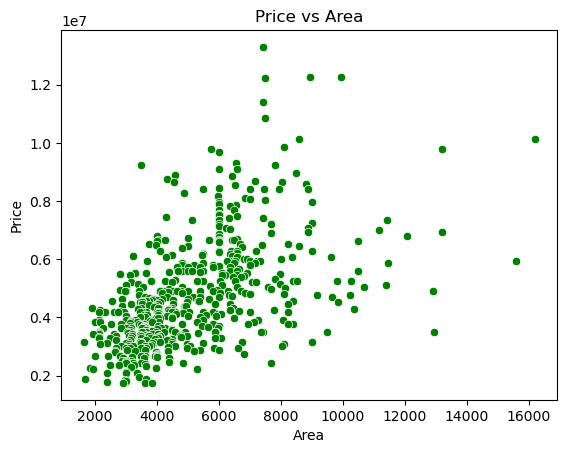

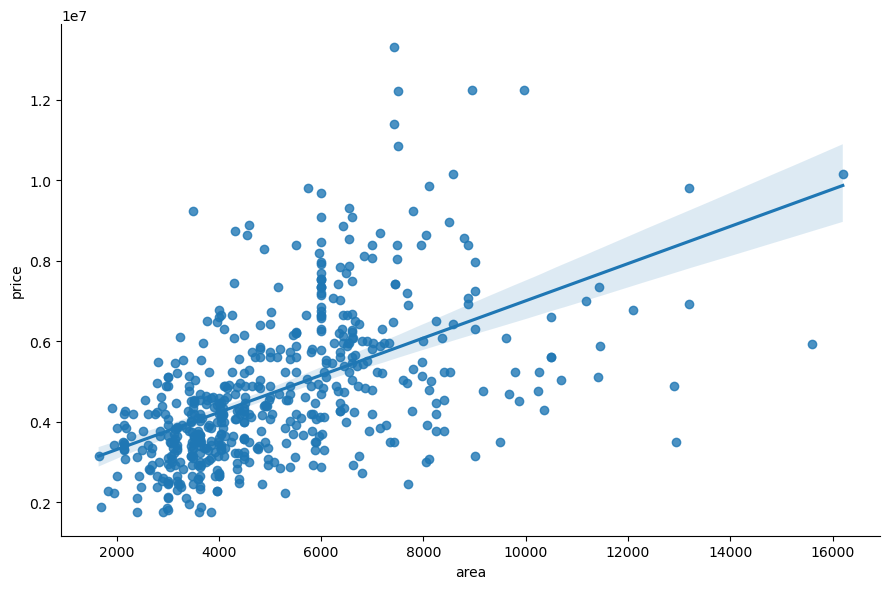

In [161]:
sns.scatterplot(x='area',y ='price',data = data,color = 'green')
plt.title("Price vs Area")
plt.xlabel("Area")
plt.ylabel("Price")
sns.lmplot(x='area',y='price',data= data,height=6,aspect=1.5)
plt.show()

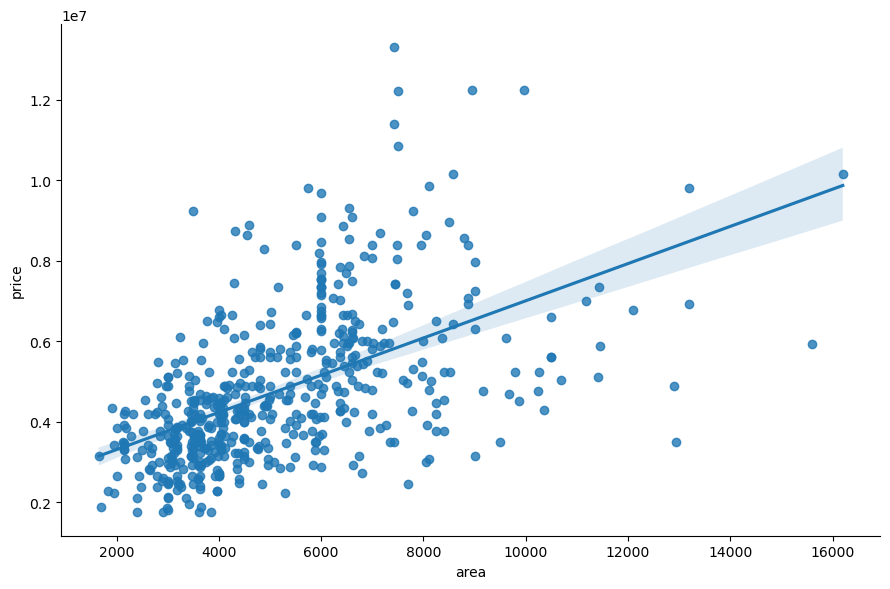

In [157]:
sns.lmplot(x='area',y='price',data= data,height=6,aspect=1.5)